<a href="https://colab.research.google.com/github/AgustinCdeCelis/Linear-Regression/blob/main/BostonHouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from matplotlib import rcParams

In [2]:
url = 'https://raw.githubusercontent.com/AgustinCdeCelis/Linear-Regression/main/housing.csv'
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
house_df = pd.read_csv(url,names = columns, header= None,delim_whitespace=True)

Features:


- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS proportion of non-retail business acres per town 
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX nitric oxides concentration (parts per 10 million) 
- RM average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways 
- TAX full-value property-tax rate per 10,000 **dollars**
- PTRATIO pupil-teacher ratio by town 
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT % lower status of the population 

target:
- HOUSE PRICE Median value of owner-occupied homes in $1000's


In [3]:
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
house_df=house_df.rename({'MEDV': 'HOUSE PRICE'},axis=1)

In [6]:
house_df.shape
#Dimensiones del Dataframe

(506, 14)

In [7]:
house_df.info()
#Check Non-Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    float64
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  HOUSE PRICE  506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#Tomamos algunas variables que se consideran la más relevantes a priori

In [9]:
house_df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [102]:
fig = px.histogram(house_df,x='RM', marginal= 'box',nbins=40, color_discrete_sequence=['lightblue'], title ='Average of rooms')
fig.update_layout(bargap=0.1)
fig.show()
#Distribucion de frecuencia prácticamente Normal

In [99]:
house_df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [103]:
fig=px.histogram(house_df,x='LSTAT',marginal='box',nbins=40,color_discrete_sequence=['seagreen'],title='% of lower status of population')
fig.update_layout(bargap=0.1)
fig.show()

#Scatterplots para visualizar cruce de datos


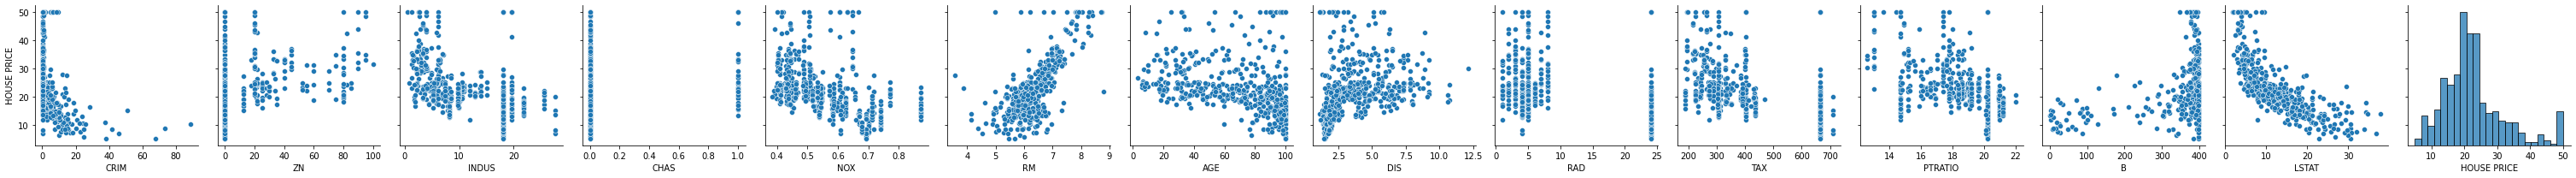

In [15]:

sns.pairplot(house_df, y_vars=['HOUSE PRICE'],height =3)
plt.tight_layout()
#Cruce de todas las variables con House Price

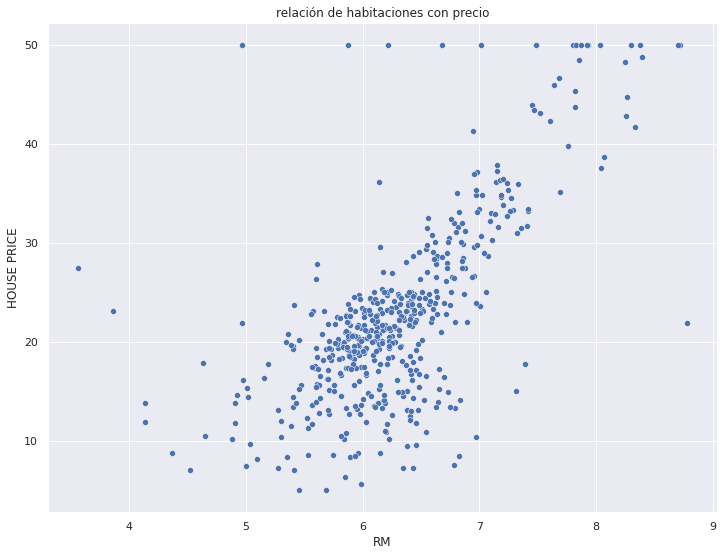

In [105]:
sns.set_theme(style='darkgrid')
plt.title("relación de habitaciones con precio")
rcParams['figure.figsize'] = 12,9
rooms = sns.scatterplot(data=house_df,x='RM',y='HOUSE PRICE')

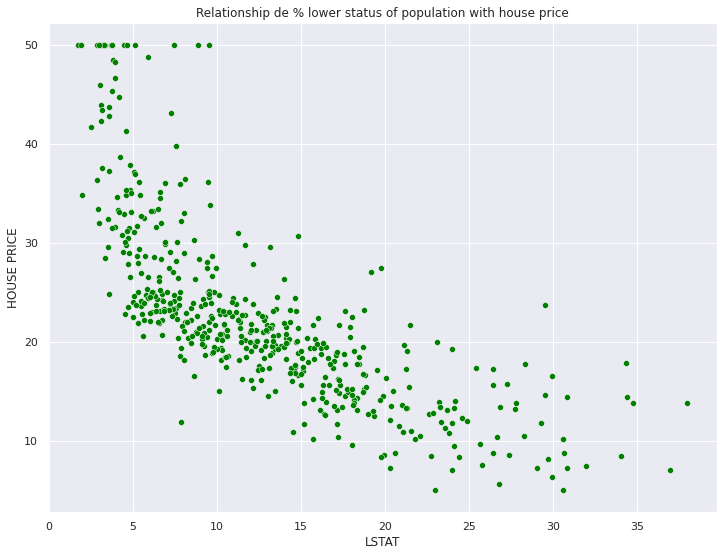

In [104]:
sns.set_theme(style='darkgrid')
plt.title('Relationship de % lower status of population with house price')
rcParams['figure.figsize'] = 12,9
TAXES = sns.scatterplot(data=house_df,x='LSTAT',y='HOUSE PRICE',color ='green')

#Correlacion de variables

In [19]:
house_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSE PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


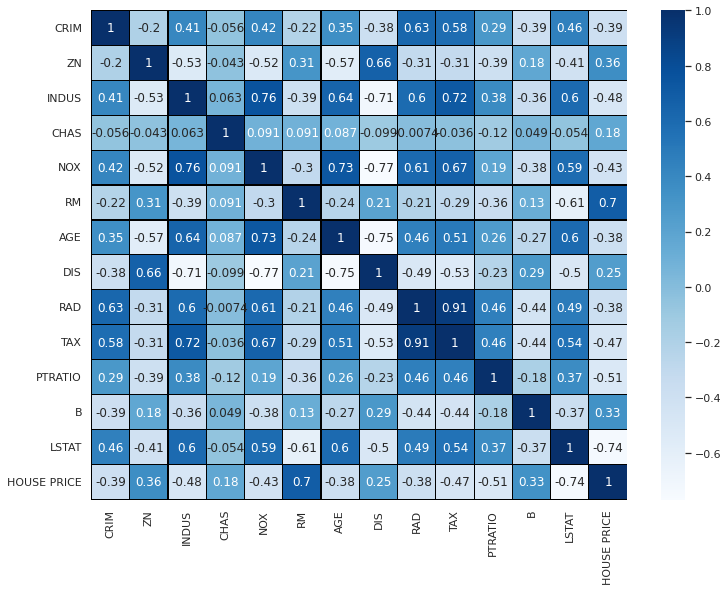

In [20]:
sns.heatmap(data=house_df.corr(),annot=True,cmap='Blues',linewidth= 0.1,linecolor= 'black');

Como se pudo observar en el gráfico y a partir de la función corr(), las dos funciones que mejor se relacionan con la variable House price son LSTAT y RM.

#Regresión Lineal con una Variable

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [111]:
model = LinearRegression()

In [112]:
target=house_df['HOUSE PRICE']

In [113]:
input= house_df[['LSTAT']]

In [114]:
input.value_counts()

LSTAT
18.13    3
8.05     3
7.79     3
6.36     3
14.10    3
        ..
9.16     1
9.14     1
9.10     1
9.09     1
37.97    1
Length: 455, dtype: int64

In [115]:
model.fit(input,target)

LinearRegression()

In [116]:
prediction = model.predict(input)
#prediction


In [117]:
print("el coeficiente de la regresión lineal es ",model.coef_)
print("el intercept con el eje y es ",model.intercept_)
#Coeficiente de la Recta de Regresión lineal y ordenada al origen de la recta.

el coeficiente de la regresión lineal es  [-0.95004935]
el intercept con el eje y es  34.5538408793831


The residuals are the distance between the line and the targets**





In [118]:
residual = target - prediction
residual

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Name: HOUSE PRICE, Length: 506, dtype: float64

In [119]:
rmse = np.sqrt(mean_squared_error(target,prediction))
#ROOT MEAN SQUARED ERROR
print("el error cuadrado medio es ",rmse)

el error cuadrado medio es  6.20346413142642


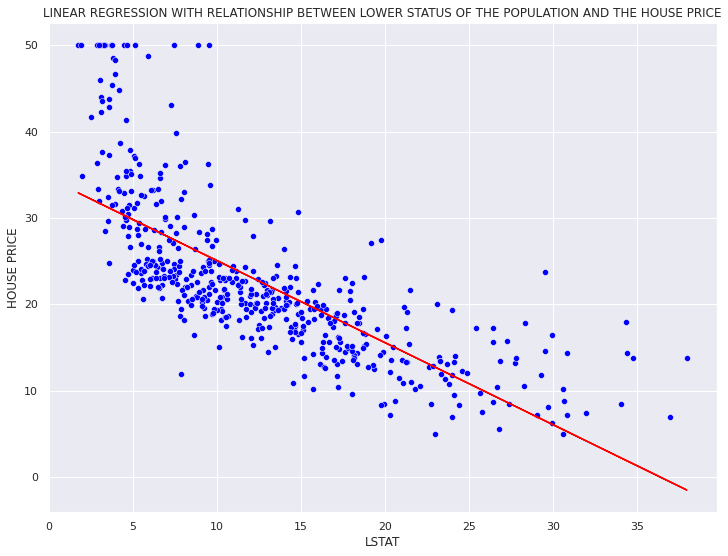

In [120]:

sns.set_theme(style='darkgrid')
plt.title("LINEAR REGRESSION WITH RELATIONSHIP BETWEEN LOWER STATUS OF THE POPULATION AND THE HOUSE PRICE")
rcParams['figure.figsize'] = 12,9
plt.plot(house_df['LSTAT'], prediction,color='red')
rooms = sns.scatterplot(data=house_df,x='LSTAT',y='HOUSE PRICE',color='blue')



  **Regresion lineal con otro Feature(Rooms)**

In [121]:
MODEL = LinearRegression()

In [122]:
inputB = house_df[['RM']]

In [123]:
MODEL.fit(inputB,target)

LinearRegression()

In [124]:
print("el coeficiente del Modelo es: ", MODEL.coef_)
print("la ordenada al origen del coeficiente es: ",MODEL.intercept_)

el coeficiente del Modelo es:  [9.10210898]
la ordenada al origen del coeficiente es:  -34.67062077643857


In [125]:
predictionb = MODEL.predict(inputB)

In [127]:
residuals = target - predictionb
residuals

0     -1.175746
1     -2.174021
2      3.971968
3      4.374062
4      5.817848
         ...   
501   -2.939584
502   -0.434286
503   -4.925691
504   -5.169108
505   -8.315096
Name: HOUSE PRICE, Length: 506, dtype: float64

In [129]:
RMSE = np.sqrt(mean_squared_error(target,predictionb))
#Root Mean Squared Error
print("el RMSE del modelo es ",RMSE)

el RMSE del modelo es  6.603071389222561


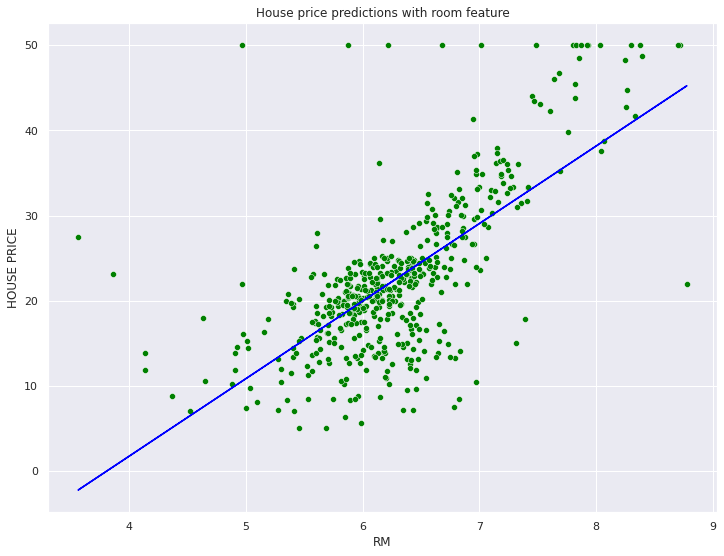

In [39]:
plt.title("House price predictions with room feature")
plt.plot(house_df['RM'],predictionb,color='blue')
sns.scatterplot(x=house_df['RM'],y=house_df['HOUSE PRICE'], color='green');

# Multiple Lineal Regression

En primera medida, vamos a seleccionar features. Se deja de lado en primera medida CHAS por tener una baja relación con la variable dependiente

In [130]:
house_df.var()
#como se puede obsevar NOX, RM y CHAS tienen poca variación de en sus categorias. Por esos mismos, quitaremos las otras dos siguientes y probamos el modelo. Pero si le sacamos el RM se eleva bastante el valor del RMSE, por eso decidimos dejárselo y sólo sacaremos NOX. Sumado a como se pudo observar que es la segunda variable que mejor se relaciona con nuestro target

CRIM              73.986578
ZN               543.936814
INDUS             47.064442
CHAS               0.064513
NOX                0.013428
RM                 0.493671
AGE              792.358399
DIS                4.434015
RAD               75.816366
TAX            28404.759488
PTRATIO            4.686989
B               8334.752263
LSTAT             50.994760
HOUSE PRICE       84.586724
dtype: float64

Posteriormente, analizando el cuadro de correlación entre variables observamos que INDUS Y RAD TIENEN UNA ALTA RELACION DE MULTICOLINEARIDAD. Age e Indus fueron descartados porque la hipotesis nula no fueron rechazados al analizar el OLS result. Por una cuestión espacial, decidimos omitir ese análisis. Por ese motivo, decidimos comenzar a hacer el análisis con las 2 variables que más se correlacionan con la variable independiente LSTAT y RM, luego observamos que las 3 restantes seleccionadas no se correlacionan entre sí y le dan menor margen de error al modelo seleccionado.

In [83]:
#PRUEBA CON 5 FEATURES
test =house_df[['LSTAT','RM','PTRATIO','CRIM','DIS']]
test

,LSTAT,RM,PTRATIO,CRIM,DIS
0,4.98,6.575,15.3,0.00632,4.0900
1,9.14,6.421,17.8,0.02731,4.9671
2,4.03,7.185,17.8,0.02729,4.9671
3,2.94,6.998,18.7,0.03237,6.0622
4,5.33,7.147,18.7,0.06905,6.0622
...,...,...,...,...,...
501,9.67,6.593,21.0,0.06263,2.4786
502,9.08,6.120,21.0,0.04527,2.2875
503,5.64,6.976,21.0,0.06076,2.1675
504,6.48,6.794,21.0,0.10959,2.3889


In [90]:
model =LinearRegression()

In [91]:
model.fit(test,target)

LinearRegression()

In [93]:
predict_prueba =model.predict(test)

In [131]:
RMSE = np.sqrt(mean_squared_error(target,predict_prueba))
RMSE

5.067794562275595

In [92]:
for name, coef in zip(test,model.coef_):
  print(f'The feature {name}:  Coef {coef}')
  #Each Variable Coefficient

The feature LSTAT:  Coef -0.6244012447852129
The feature RM:  Coef 4.332557982874727
The feature PTRATIO:  Coef -0.9213796667927375
The feature CRIM:  Coef -0.09180815237868512
The feature DIS:  Coef -0.6201062580071512


In [97]:
print("El intecept del modelo es ",model.intercept_)

El intecept del modelo es  22.89448591522039


In [133]:
modelfinal = sm.OLS(target,test.assign(const=1))
results = modelfinal.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            HOUSE PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 16 May 2022   Prob (F-statistic):          1.10e-126
Time:                        23:03:23   Log-Likelihood:                -1539.2
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -0.6244      0.048    -12.911      0.0

Como se puede observar, no se puede observar mucha diferencia entre R-Squared y ADj. R-squared, siendo un buen inicio para aceptar el modelo como válido. Luego, se observa que los Prob (F-statistic) es menor que el F-statistic, otro indicio de que es un buen modelo. Por otro lado, los P-values(el más alto de 0.003) son menores que los T-statistic,rechazando la hipótesis nula. Por último no hay indicio de Colinealidad.

In [134]:
from sklearn.model_selection import train_test_split

AHORA, HACEMOS LO MISMO CON UN TEST SET PARA CORROBORAR CÓMO FUNCIONA EL MODELO

In [137]:
x = house_df[['LSTAT','RM','PTRATIO','CRIM','DIS']]


In [138]:
y= house_df['HOUSE PRICE']

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state =1)
#DEJAMOS UN 10% DE LA DATA PARA TESTEAR EL MODELO

In [193]:
model =LinearRegression()

In [194]:
model.fit(x_train,y_train)

LinearRegression()

In [195]:
predict = model.predict(x_train)

In [196]:
RMSE = np.sqrt(mean_squared_error(y_train,predict))
print("La perdida del entrenamiento ",RMSE.round(2))

La perdida del entrenamiento  5.12


AHORA, HAREMOS LO MISMO CON EL TEST SET

In [197]:
model_test = LinearRegression()

In [198]:
model.fit(x_test,y_test)

LinearRegression()

In [202]:
predict_test = model.predict(x_test)

In [203]:
RMSE = np.sqrt(mean_squared_error(y_test,predict_test))
print("La pérdida del TEST SET es ",RMSE.round(2))

La pérdida del TEST SET es  4.22
